--- 0. Importing Libraries ---
Libraries imported and seed set.

--- 1. Loading Data ---
Data loaded successfully.

--- 2. Detailed Exploratory Data Analysis (EDA) ---

--- 2.1. Initial Data Inspection ---
First 5 rows of the data:
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may      

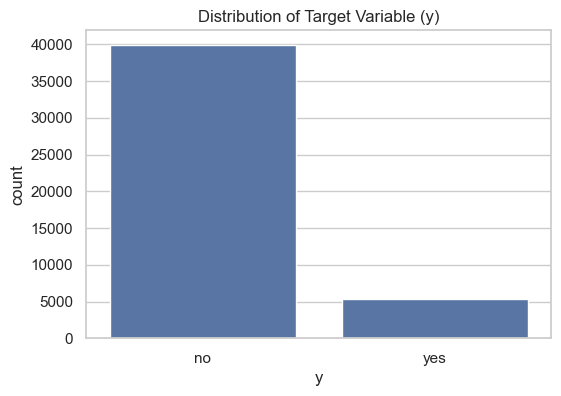

Displayed plot: Target Variable Distribution

--- 2.3. Numerical Features ---
Numerical columns: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
Plotting histograms for numerical features...


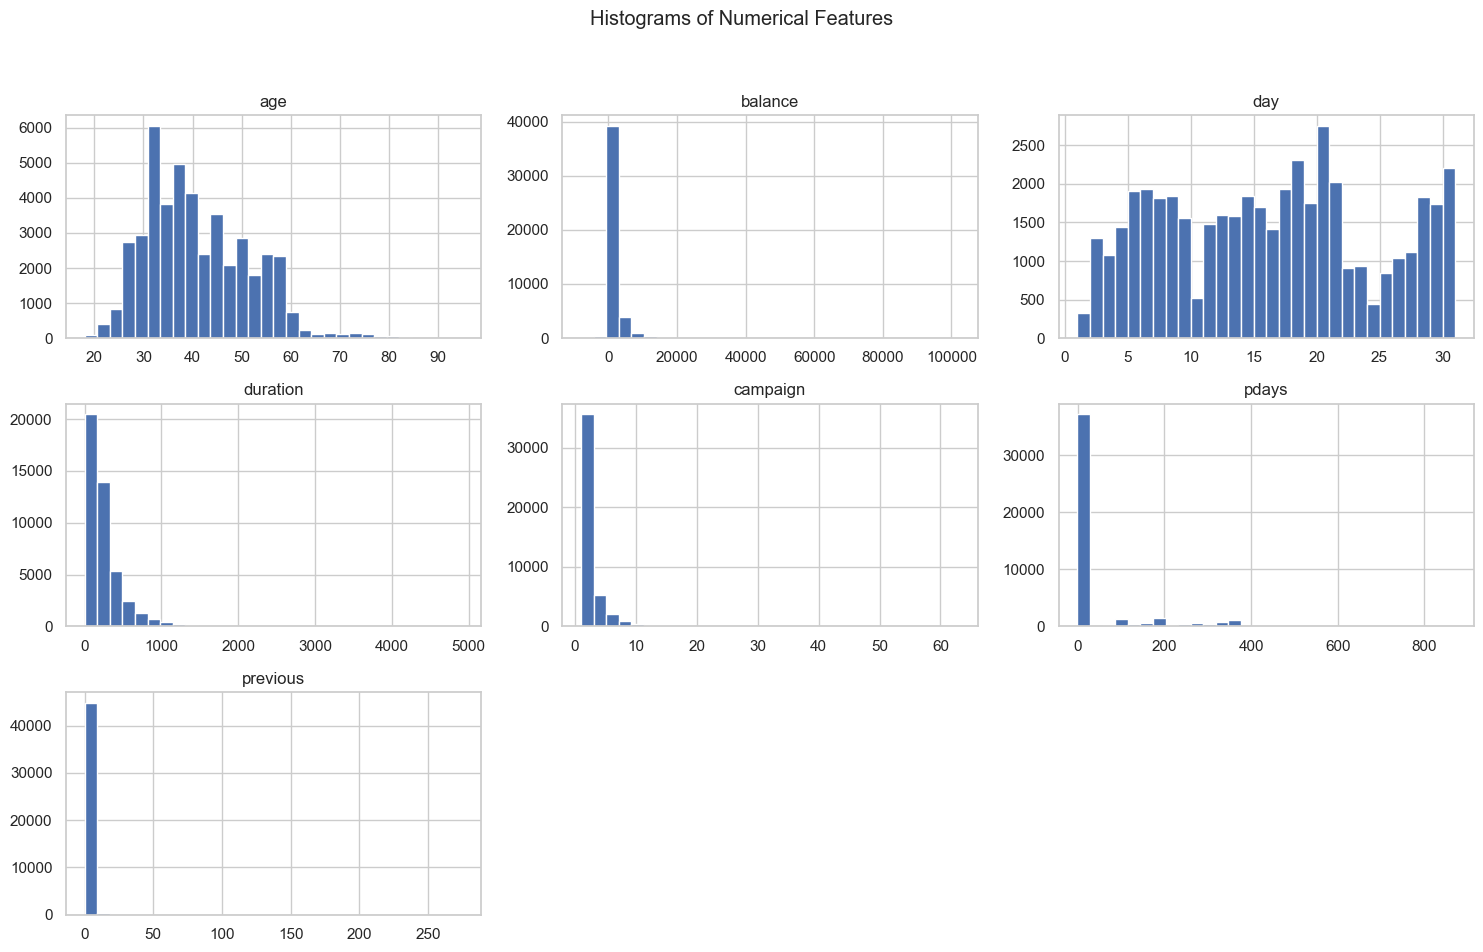

Displayed plot: Numerical Histograms
Observation: 'age', 'balance', 'duration' are right-skewed.
Plotting boxplots for numerical features vs. target 'y'...


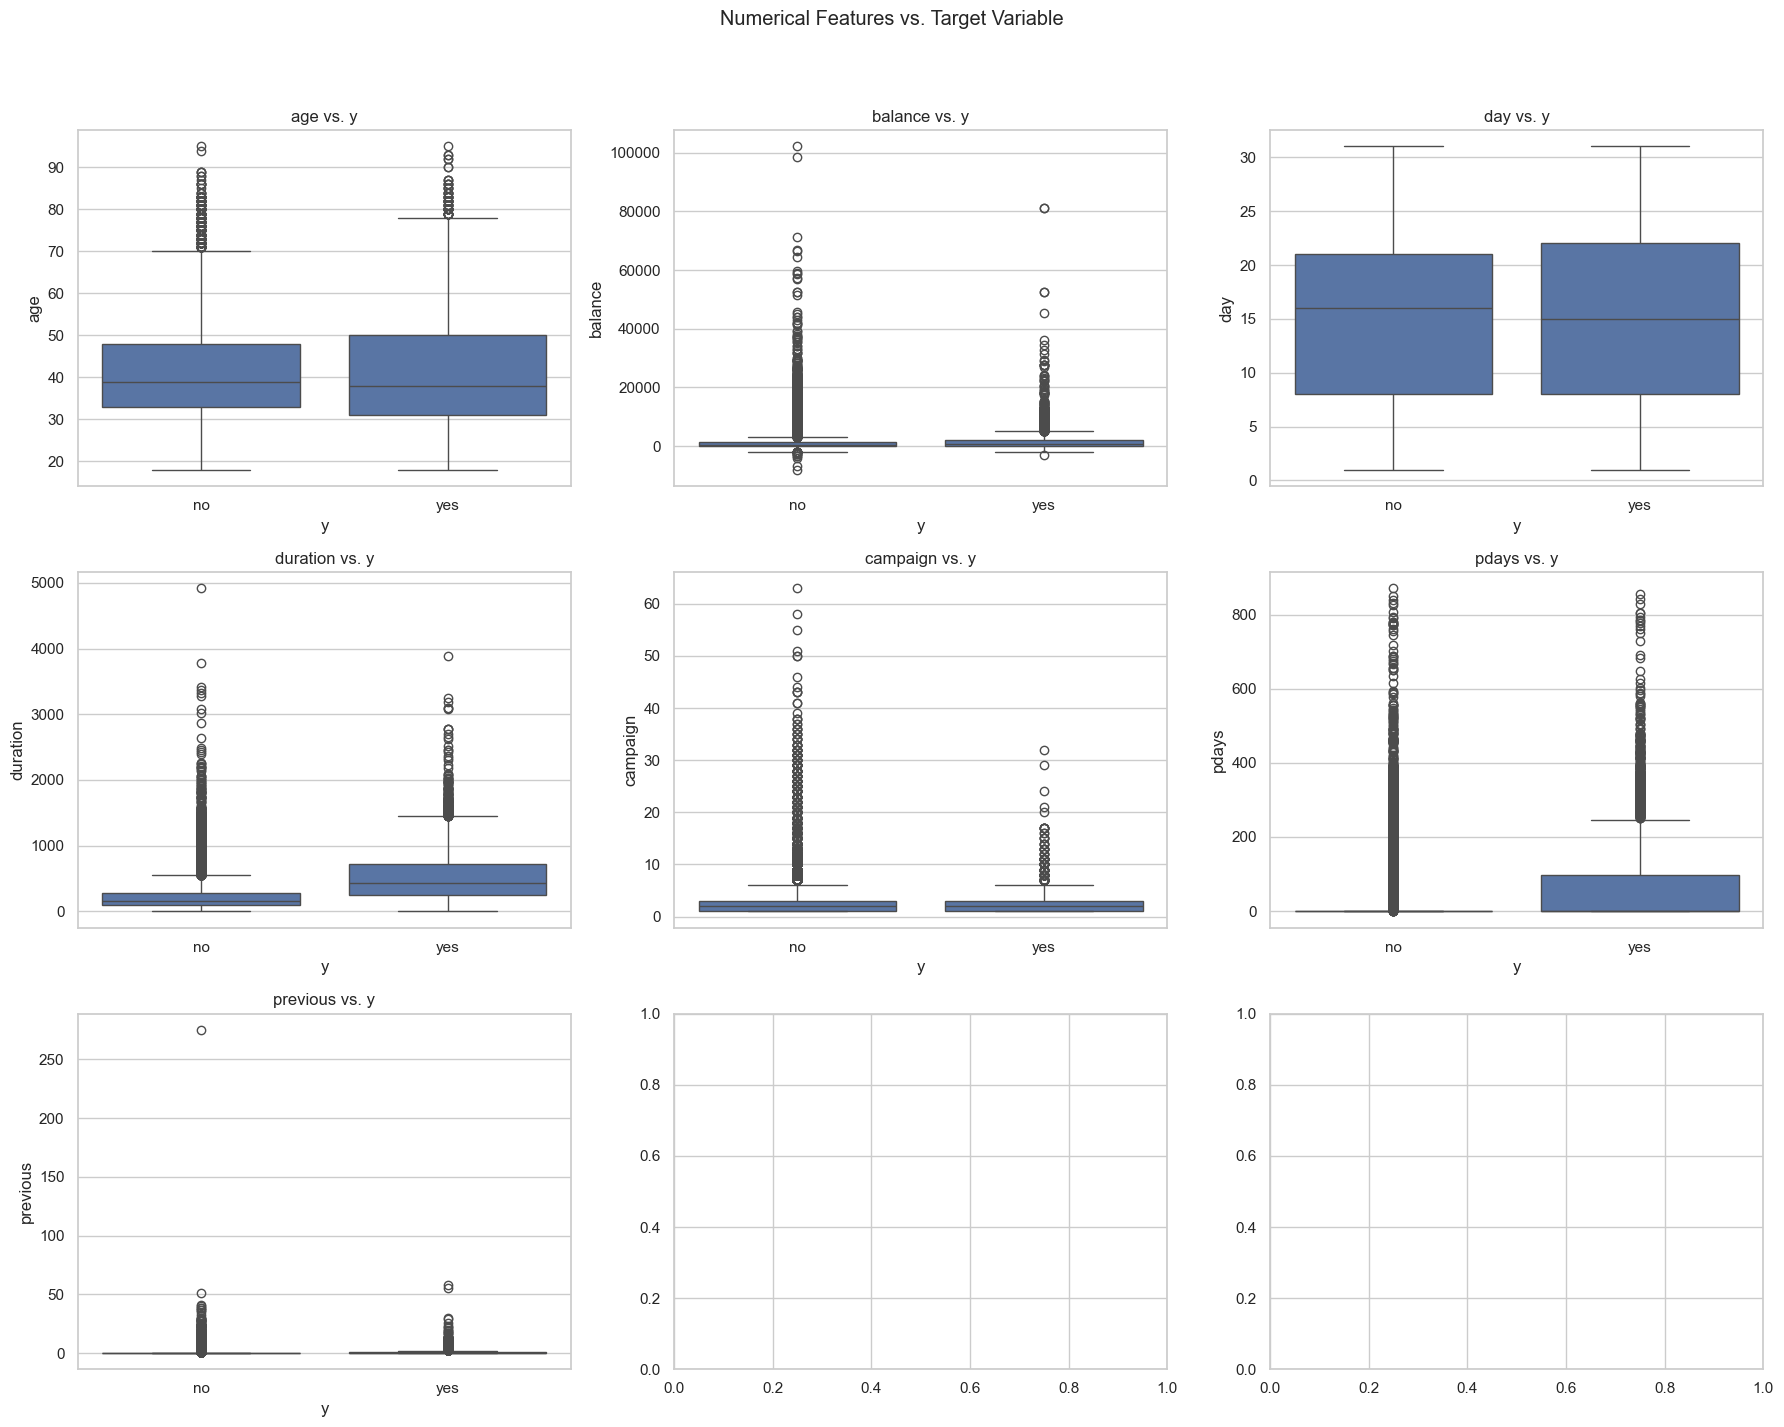

Displayed plot: Numerical Boxplots vs. y
Observation: 'duration' seems to be a strong predictor; 'yes' subs have much longer call durations.
Plotting correlation heatmap for numerical features...


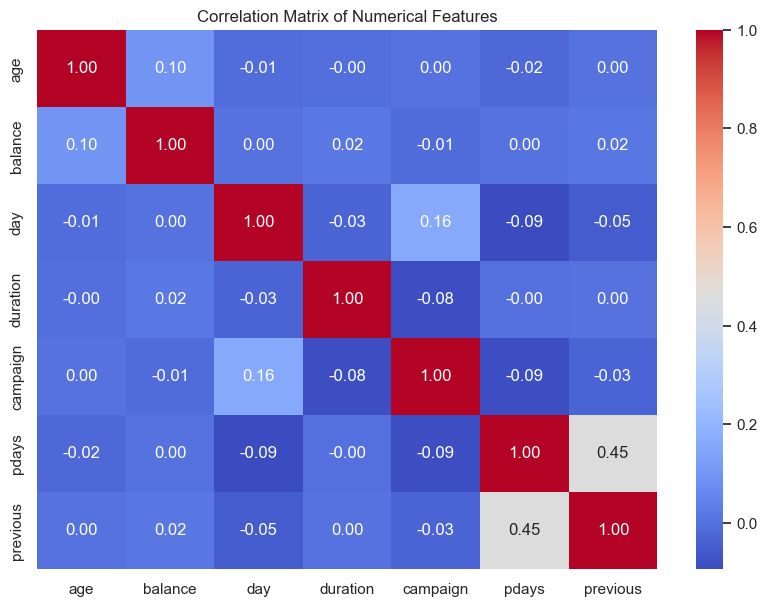

Displayed plot: Correlation Heatmap
Observation: Most numerical features have low correlation with each other.

--- 2.4. Categorical Features ---
Categorical columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
Plotting distributions for key categorical features: ['job', 'marital', 'education', 'poutcome', 'contact']


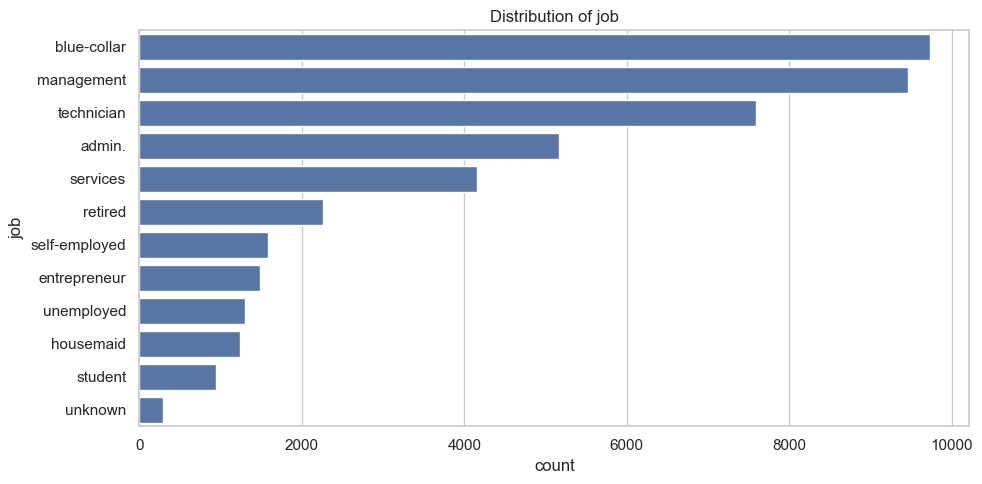

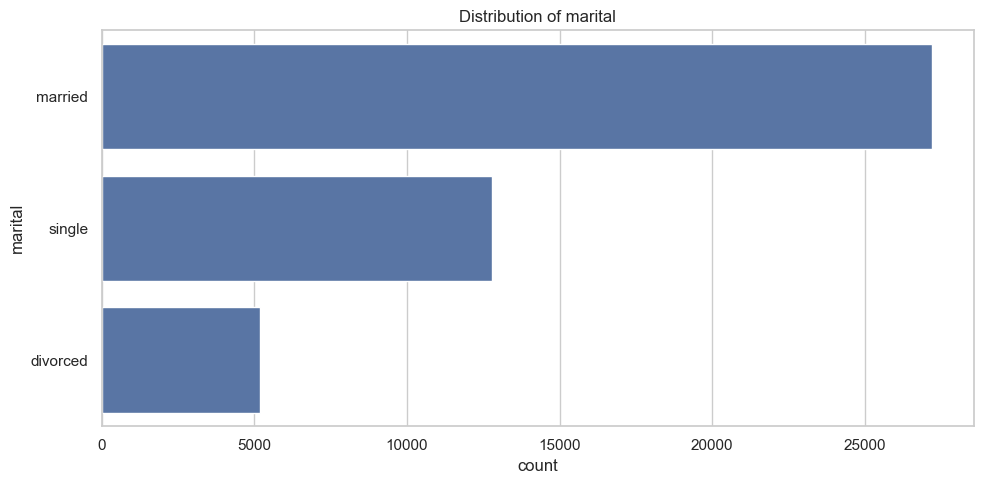

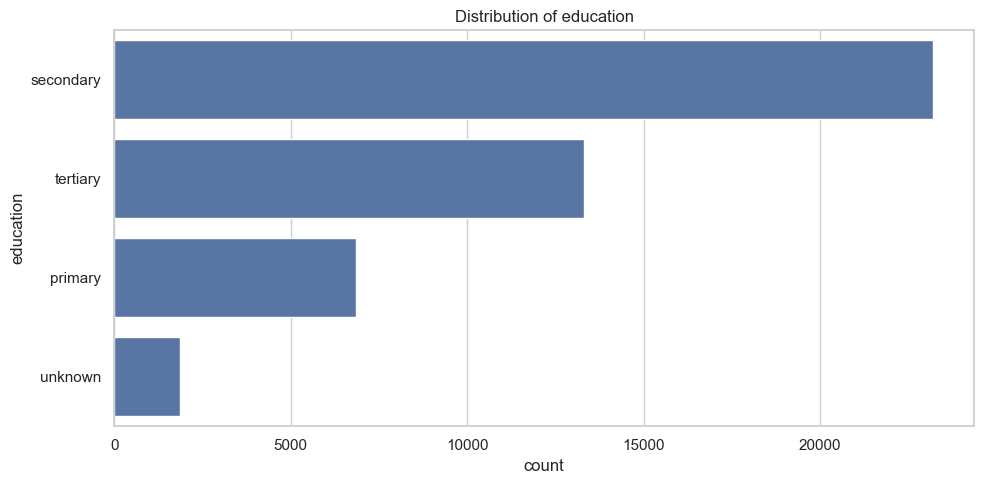

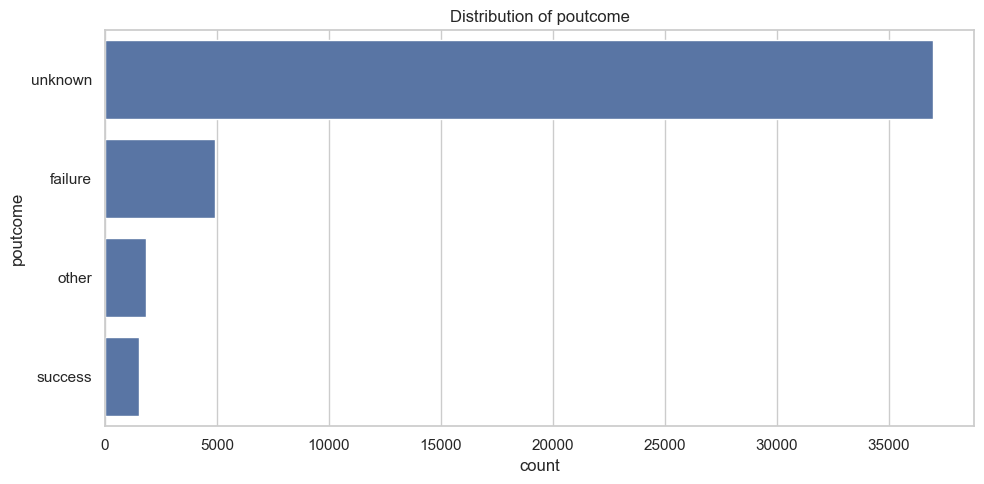

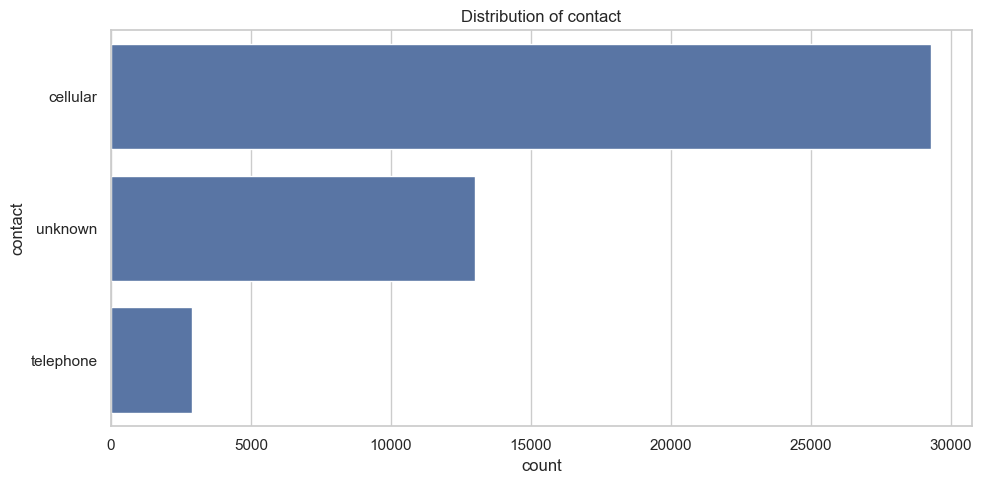

Displayed plots: Categorical Distributions
Plotting key categorical features vs. target 'y'...


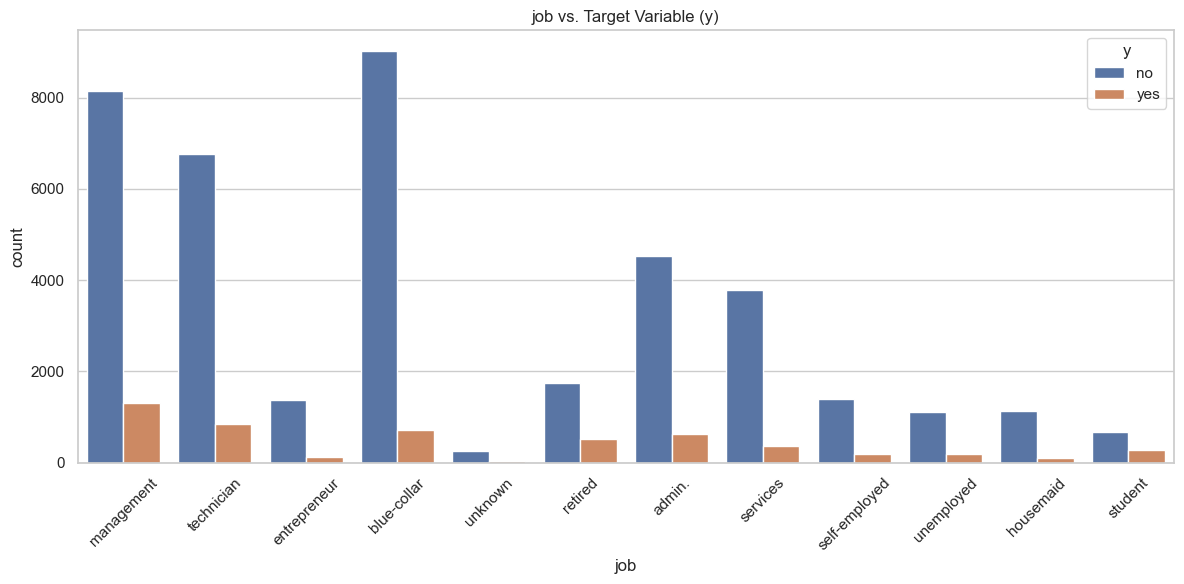

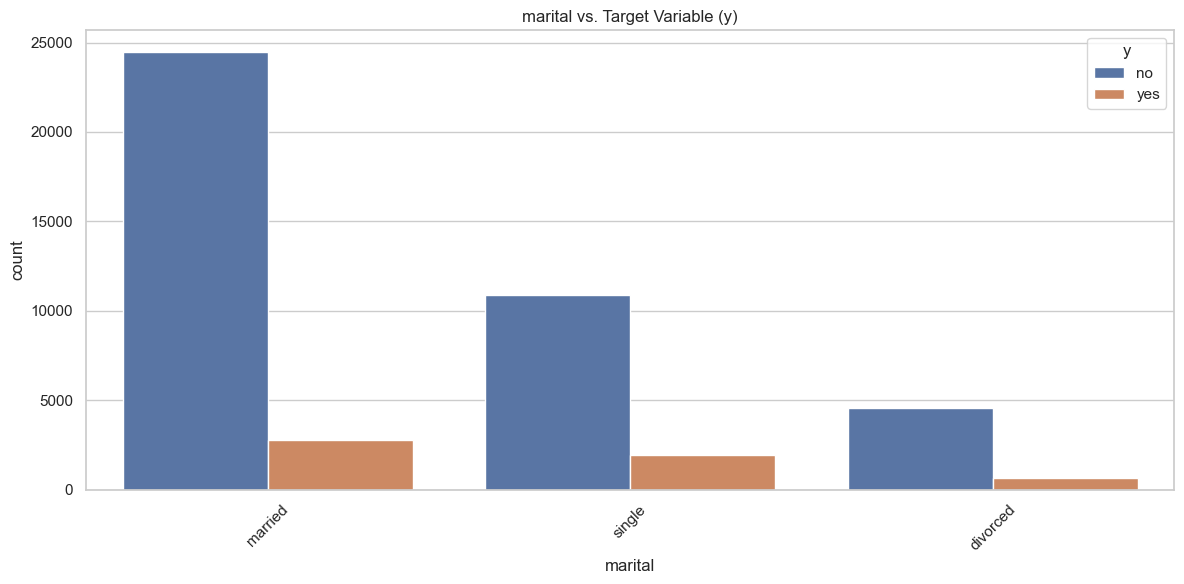

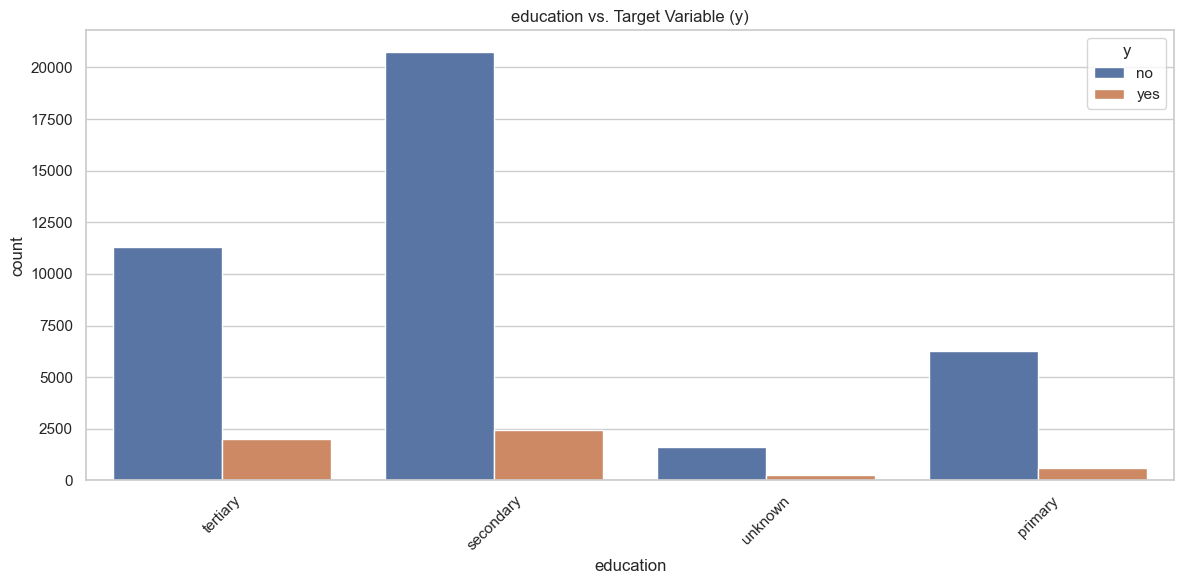

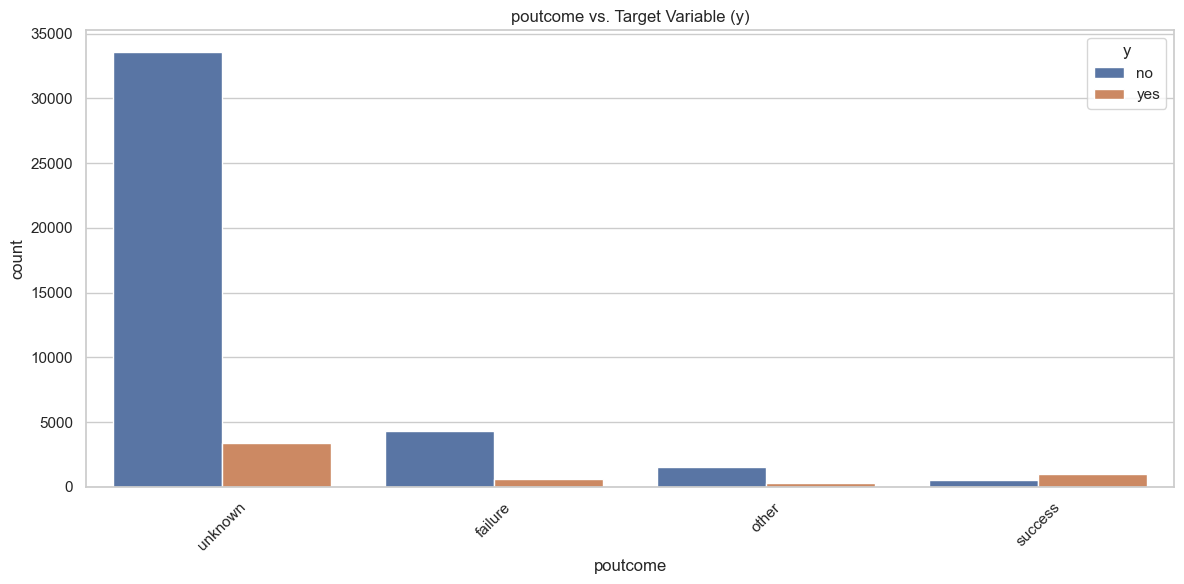

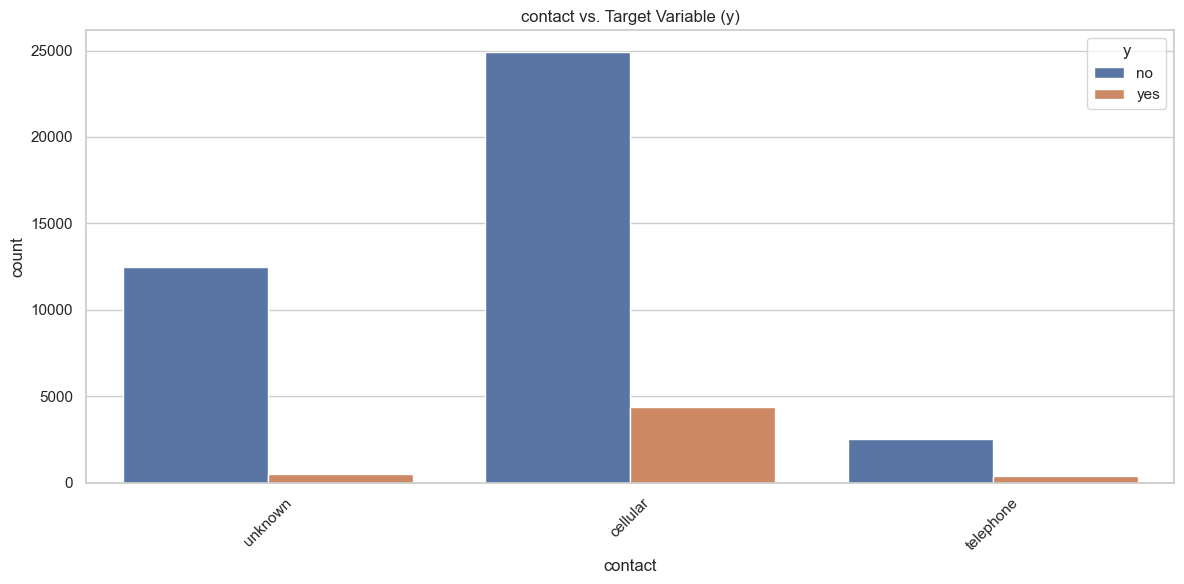

Displayed plots: Categorical Features vs. y
Observation: 'poutcome' (previous outcome) seems very predictive. 'success' has a high 'yes' rate.

--- EDA Complete ---

--- 3. Data Preprocessing ---
Goal: Convert all features into a numerical format for the model.
Converted target 'y' to 1 (yes) and 0 (no).
Converted binary columns ['default', 'housing', 'loan'] to 1/0.

Numerical columns to be scaled: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
Categorical columns to be one-hot encoded: ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
Preprocessing (Part 1) complete. Scaling and Encoding will happen *after* train-test split.

--- 4. Train-Test Split (From Scratch) ---
Splitting data 80% (train) and 20% (test) after random shuffling.
Total samples: 45211
Training samples: 36168 (80.0%)
Test samples: 9043 (20.0%)
Data successfully split into X_train, y_train, X_test, y_test.

--- 4.5. Continuing Preprocessing (post-split) ---
Applying One-Hot Encod

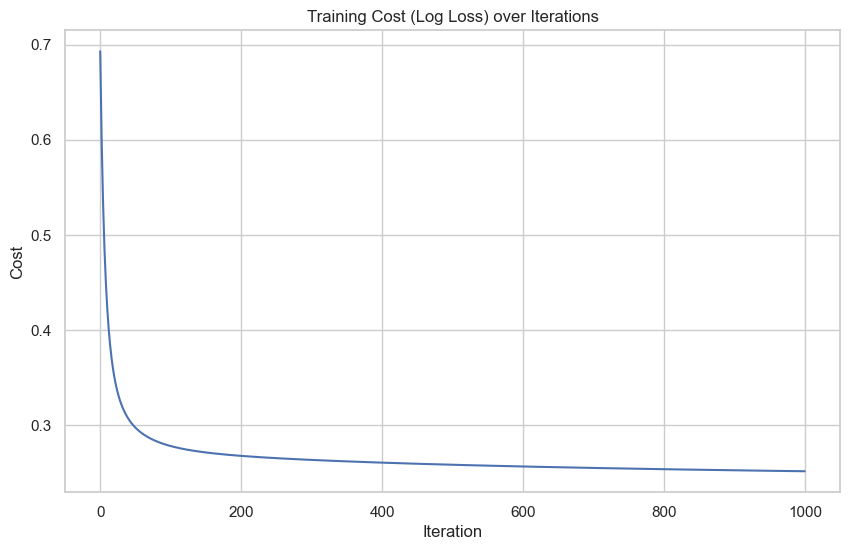

Displayed plot: Training Cost History
Observation: Cost decreased steadily, showing the model learned.

Predictions made on the test set.

--- 6.4. Evaluation Metrics (From Scratch) ---
Confusion Matrix:
[[7844  136]
 [ 769  294]]
True Negatives (TN): 7844 (Correctly predicted 'no')
False Positives (FP): 136 (Incorrectly predicted 'yes')
False Negatives (FN): 769 (Incorrectly predicted 'no')
True Positives (TP): 294 (Correctly predicted 'yes')


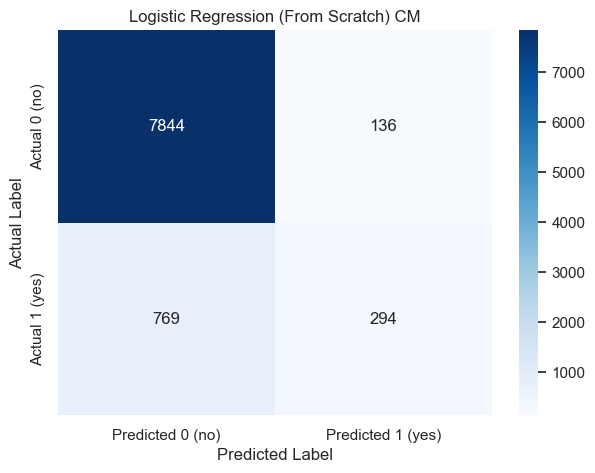


Displayed plot: Confusion Matrix Heatmap

--- Calculated Metrics ---
Accuracy:   0.8999  (Overall correctness)
Precision:  0.6837  (Correctness of positive predictions)
Recall:     0.2766  (Completeness of positive predictions)
F1-Score:   0.3938  (Balance between Precision and Recall)

--- End of Lab Assignment ---


In [4]:
################################################################################
#
#  Lab Assignment: Logistic Regression from Scratch on Bank Marketing Data
#
#  This notebook implements a complete machine learning pipeline:
#  1. Detailed Exploratory Data Analysis (EDA) with visualizations.
#  2. Data Preprocessing (scaling, encoding).
#  3. Train-Test Split (from scratch).
#  4. Logistic Regression Model (from scratch).
#  5. Model Evaluation with metrics (from scratch) and visualizations.
#
################################################################################

# --- 0. Import Libraries ---
print("--- 0. Importing Libraries ---")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style="whitegrid")
# Set a random seed for reproducibility
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
print("Libraries imported and seed set.")

# --- 1. Load Data ---
print("\n--- 1. Loading Data ---")
try:
    # The file is specified as semicolon-delimited
    df = pd.read_csv('bank-full.csv', delimiter=';')
    print("Data loaded successfully.")
except FileNotFoundError:
    print("Error: 'bank-full.csv' not found. Please make sure the file is in the same directory.")
    # In a notebook, we'd stop here.
    # exit() 
except Exception as e:
    print(f"An error occurred loading the data: {e}")
    # exit()

print("\n--- 2. Detailed Exploratory Data Analysis (EDA) ---")

# 2.1. Initial Data Inspection
print("\n--- 2.1. Initial Data Inspection ---")
print("First 5 rows of the data:")
print(df.head())
print("\nData Info (columns, types, non-null counts):")
df.info()
print("\nSummary Statistics for Numerical Features:")
print(df.describe())

# 2.2. Target Variable Analysis
print("\n--- 2.2. Target Variable 'y' (Deposit Subscription) ---")
target_counts = df['y'].value_counts()
target_perc = df['y'].value_counts(normalize=True) * 100
print(f"Counts:\n{target_counts}")
print(f"\nPercentages:\n'no':  {target_perc['no']:.2f}%\n'yes': {target_perc['yes']:.2f}%")
print("Conclusion: The dataset is imbalanced, with 'no' being the majority class.")

plt.figure(figsize=(6, 4))
sns.countplot(x='y', data=df)
plt.title('Distribution of Target Variable (y)')
plt.show() # Display the plot
print("Displayed plot: Target Variable Distribution")

# 2.3. Numerical Feature Analysis
print("\n--- 2.3. Numerical Features ---")
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
print(f"Numerical columns: {numerical_cols}")

# Plot histograms for all numerical features
print("Plotting histograms for numerical features...")
df[numerical_cols].hist(bins=30, figsize=(15, 10), layout=(3, 3))
plt.suptitle('Histograms of Numerical Features')
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust for suptitle
plt.show() # Display the plot
print("Displayed plot: Numerical Histograms")
print("Observation: 'age', 'balance', 'duration' are right-skewed.")

# Plot boxplots of numerical features against the target variable 'y'
print("Plotting boxplots for numerical features vs. target 'y'...")
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.flatten()
for i, col in enumerate(numerical_cols):
    sns.boxplot(x='y', y=col, data=df, ax=axes[i])
    axes[i].set_title(f'{col} vs. y')
plt.suptitle('Numerical Features vs. Target Variable')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show() # Display the plot
print("Displayed plot: Numerical Boxplots vs. y")
print("Observation: 'duration' seems to be a strong predictor; 'yes' subs have much longer call durations.")

# Correlation Heatmap for numerical features
print("Plotting correlation heatmap for numerical features...")
plt.figure(figsize=(10, 7))
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show() # Display the plot
print("Displayed plot: Correlation Heatmap")
print("Observation: Most numerical features have low correlation with each other.")

# 2.4. Categorical Feature Analysis
print("\n--- 2.4. Categorical Features ---")
categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols.remove('y') # 'y' is our target
print(f"Categorical columns: {categorical_cols}")

# Plot distributions for key categorical features
key_cats = ['job', 'marital', 'education', 'poutcome', 'contact']
print(f"Plotting distributions for key categorical features: {key_cats}")
for col in key_cats:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show() # Display the plot
print(f"Displayed plots: Categorical Distributions")

# Plot key categorical features against the target 'y'
print(f"Plotting key categorical features vs. target 'y'...")
for col in key_cats:
    plt.figure(figsize=(12, 6))
    # Using 'hue' shows the breakdown by 'y'
    sns.countplot(x=col, hue='y', data=df)
    plt.title(f'{col} vs. Target Variable (y)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show() # Display the plot
print(f"Displayed plots: Categorical Features vs. y")
print("Observation: 'poutcome' (previous outcome) seems very predictive. 'success' has a high 'yes' rate.")

print("\n--- EDA Complete ---")


# --- 3. Data Preprocessing ---
print("\n--- 3. Data Preprocessing ---")
print("Goal: Convert all features into a numerical format for the model.")

# Create a copy to avoid modifying the original dataframe
data_processed = df.copy()

# 3.1. Convert target variable 'y' to binary (1 for 'yes', 0 for 'no')
data_processed['y'] = data_processed['y'].map({'yes': 1, 'no': 0})
print("Converted target 'y' to 1 (yes) and 0 (no).")

# 3.2. Convert binary categorical features to 0/1
# These are features that only have 'yes' or 'no' values
binary_cols = ['default', 'housing', 'loan']
for col in binary_cols:
    data_processed[col] = data_processed[col].map({'yes': 1, 'no': 0})
print(f"Converted binary columns {binary_cols} to 1/0.")

# 3.3. Identify remaining numerical and categorical columns for processing
# 'day' and 'month' are cyclical, but for simplicity, we'll treat 'day' as numerical
# and 'month' as categorical.
numerical_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
# We already processed 'default', 'housing', 'loan', so we use the categorical_cols list from EDA
categorical_cols = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']

print(f"\nNumerical columns to be scaled: {numerical_cols}")
print(f"Categorical columns to be one-hot encoded: {categorical_cols}")
print("Preprocessing (Part 1) complete. Scaling and Encoding will happen *after* train-test split.")

# --- 4. Train-Test Split (From Scratch) ---
print("\n--- 4. Train-Test Split (From Scratch) ---")
print("Splitting data 80% (train) and 20% (test) after random shuffling.")

# 4.1. Randomly shuffle the data
# We use .sample(frac=1) to shuffle. random_state ensures reproducibility.
shuffled_df = data_processed.sample(frac=1, random_state=RANDOM_SEED)

# 4.2. Calculate split index for 80:20
split_idx = int(len(shuffled_df) * 0.80)

# 4.3. Perform the split
train_df = shuffled_df.iloc[:split_idx]
test_df = shuffled_df.iloc[split_idx:]

print(f"Total samples: {len(data_processed)}")
print(f"Training samples: {len(train_df)} (80.0%)")
print(f"Test samples: {len(test_df)} (20.0%)")

# 4.4. Separate features (X) and target (y)
y_train = train_df['y']
X_train = train_df.drop('y', axis=1)

y_test = test_df['y']
X_test = test_df.drop('y', axis=1)

print("Data successfully split into X_train, y_train, X_test, y_test.")

# --- 4.5. Preprocessing (continued after split) ---
print("\n--- 4.5. Continuing Preprocessing (post-split) ---")
print("Applying One-Hot Encoding and Standardization.")
print("IMPORTANT: We fit on *training* data and transform *both* train and test data.")
print("This prevents 'data leakage' from the test set into our model.")

# 4.5.1. One-Hot Encoding for categorical features
print("Applying one-hot encoding...")
# 'drop_first=True' avoids multicollinearity (dummy variable trap)
X_train_cat = pd.get_dummies(X_train[categorical_cols], drop_first=True)
X_test_cat = pd.get_dummies(X_test[categorical_cols], drop_first=True)

# Align columns: Ensure test set has same columns as train set
# Some categories might be in train but not test, or vice-versa.
X_train_cat_cols = X_train_cat.columns
X_test_cat = X_test_cat.reindex(columns=X_train_cat_cols, fill_value=0)
print(f"Created {len(X_train_cat_cols)} dummy variables.")

# 4.5.2. Standardization for numerical features (Z-score scaling from scratch)
print("Applying standardization (Z-score scaling)...")
X_train_num = pd.DataFrame(index=X_train.index)
X_test_num = pd.DataFrame(index=X_test.index)
scaler_stats = {} # To store mean/std for each column

for col in numerical_cols:
    # 1. Calculate mean and std *only* from training data
    mean = X_train[col].mean()
    std = X_train[col].std()
    
    # Store stats
    scaler_stats[col] = {'mean': mean, 'std': std}
    
    # 2. Apply transformation to both train and test
    # Handle std=0 (constant feature) by setting scaled value to 0
    if std > 0:
        X_train_num[col] = (X_train[col] - mean) / std
        X_test_num[col] = (X_test[col] - mean) / std
    else:
        # This feature is constant, scaling it results in 0
        X_train_num[col] = 0
        X_test_num[col] = 0
print("Scaling complete.")

# 4.5.3. Combine all processed features
print("Combining all processed features (scaled numerical, binary, one-hot)...")
X_train_final = pd.concat([X_train_num, X_train[binary_cols], X_train_cat], axis=1)
X_test_final = pd.concat([X_test_num, X_test[binary_cols], X_test_cat], axis=1)

print(f"Final feature set shape (Train): {X_train_final.shape}")
print(f"Final feature set shape (Test):  {X_test_final.shape}")

# 4.5.4. Convert to NumPy arrays for the algorithm
# Our from-scratch model will work with NumPy
# Explicitly set dtype=float to ensure all data is numeric
print("Converting final data to NumPy arrays...")
X_train_np = X_train_final.values.astype(float)
y_train_np = y_train.values.astype(float)

X_test_np = X_test_final.values.astype(float)
y_test_np = y_test.values.astype(float)

print("Data is now fully preprocessed and ready for the model.")


# --- 5. Logistic Regression (From Scratch) ---
print("\n--- 5. Logistic Regression (From Scratch) ---")

class LogisticRegressionFromScratch:
    """
    Implements Logistic Regression using Batch Gradient Descent from scratch.
    
    Parameters:
    lr (float): The learning rate for gradient descent.
    n_iters (int): The number of iterations to run gradient descent.
    """
    
    def __init__(self, lr=0.01, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.cost_history = [] # To track cost over time

    def _sigmoid(self, z):
        """
        Private helper function to compute the sigmoid activation.
        z = w.X + b
        sigmoid(z) = 1 / (1 + e^-z)
        Clips values to avoid overflow in exp() for large negative numbers.
        """
        z_clipped = np.clip(z, -250, 250)
        return 1 / (1 + np.exp(-z_clipped))

    def _compute_cost(self, y, y_pred_proba):
        """
        Computes the Log Loss (Binary Cross-Entropy) cost.
        Cost J(w,b) = -(1/m) * sum[y*log(y_pred) + (1-y)*log(1-y_pred)]
        Includes epsilon to avoid log(0).
        """
        epsilon = 1e-9
        n_samples = len(y)
        cost = -(1/n_samples) * np.sum(
            y * np.log(y_pred_proba + epsilon) + 
            (1 - y) * np.log(1 - y_pred_proba + epsilon)
        )
        return cost

    def fit(self, X, y):
        """
        Train the logistic regression model using batch gradient descent.
        
        X (np.array): Training features (n_samples, n_features)
        y (np.array): Training target (n_samples,)
        """
        n_samples, n_features = X.shape
        
        # 1. Initialize parameters
        self.weights = np.zeros(n_features)
        self.bias = 0
        self.cost_history = []
        
        print(f"Starting training: lr={self.lr}, iterations={self.n_iters}")
        
        # 2. Gradient Descent Loop
        for i in range(self.n_iters):
            # 2a. Compute linear model: z = X.w + b
            linear_model = np.dot(X, self.weights) + self.bias
            
            # 2b. Apply sigmoid to get probabilities: y_pred = sigmoid(z)
            y_predicted_proba = self._sigmoid(linear_model)
            
            # 2c. Calculate cost (for tracking progress)
            cost = self._compute_cost(y, y_predicted_proba)
            self.cost_history.append(cost)
            
            # 2d. Calculate gradients (derivatives of cost w.r.t. w and b)
            # dw = (1/m) * X.T * (y_pred - y)
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted_proba - y))
            # db = (1/m) * sum(y_pred - y)
            db = (1 / n_samples) * np.sum(y_predicted_proba - y)
            
            # 2e. Update parameters (move in the opposite direction of the gradient)
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            
            # Print progress
            if i % (self.n_iters // 10) == 0 or i == self.n_iters - 1:
                print(f"Iteration {i}: Cost = {cost:.4f}")

    def predict_proba(self, X):
        """
        Predict class probabilities (0 to 1) for new data.
        """
        linear_model = np.dot(X, self.weights) + self.bias
        return self._sigmoid(linear_model)

    def predict(self, X, threshold=0.5):
        """
        Predict class labels (0 or 1) based on a probability threshold.
        """
        probabilities = self.predict_proba(X)
        # Apply threshold to get binary class
        return [1 if i > threshold else 0 for i in probabilities]

print("LogisticRegressionFromScratch class defined.")


# --- 6. Model Training and Evaluation ---
print("\n--- 6. Model Training and Evaluation ---")

# 6.1. Instantiate and train the model
# These hyperparameters (lr, n_iters) can be tuned.
# 0.1 is a reasonably fast learning rate.
# 1000 iterations is a good starting point.
model = LogisticRegressionFromScratch(lr=0.1, n_iters=1000)
model.fit(X_train_np, y_train_np)

print("Model training complete.")

# 6.2. Plot Cost History
print("Plotting training cost over iterations...")
plt.figure(figsize=(10, 6))
plt.plot(range(model.n_iters), model.cost_history)
plt.title('Training Cost (Log Loss) over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.show() # Display the plot
print("Displayed plot: Training Cost History")
print("Observation: Cost decreased steadily, showing the model learned.")

# 6.3. Make predictions on the test set
y_pred_np = model.predict(X_test_np)
print("\nPredictions made on the test set.")

# 6.4. Evaluation Metrics (From Scratch)
print("\n--- 6.4. Evaluation Metrics (From Scratch) ---")

def calculate_metrics_and_plot_cm(y_true, y_pred, title='Confusion Matrix'):
    """
    Calculates Confusion Matrix, Accuracy, Precision, Recall, and F1-Score
    from scratch and plots the CM as a heatmap.
    """
    # Ensure inputs are numpy arrays
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    # 1. Calculate Confusion Matrix components
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0)) # Corrected FN definition
    
    cm = np.array([[TN, FP], [FN, TP]])
    
    print("Confusion Matrix:")
    print(cm)
    print(f"True Negatives (TN): {TN} (Correctly predicted 'no')")
    print(f"False Positives (FP): {FP} (Incorrectly predicted 'yes')")
    print(f"False Negatives (FN): {FN} (Incorrectly predicted 'no')")
    print(f"True Positives (TP): {TP} (Correctly predicted 'yes')")
    
    # Plot heatmap
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicted 0 (no)', 'Predicted 1 (yes)'],
                yticklabels=['Actual 0 (no)', 'Actual 1 (yes)'])
    plt.title(title)
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show() # Display the plot
    print("\nDisplayed plot: Confusion Matrix Heatmap")
    
    # Helper for safe division to avoid divide-by-zero
    def safe_division(numerator, denominator):
        return numerator / denominator if denominator != 0 else 0
    
    # 2. Accuracy: (TP+TN) / (All)
    # "Of all predictions, what percentage was correct?"
    total = TP + TN + FP + FN
    accuracy = safe_division(TP + TN, total)
    
    # 3. Precision: TP / (TP+FP)
    # "Of all predictions for 'yes', what percentage was correct?"
    # High precision = low false positive rate.
    precision = safe_division(TP, TP + FP)
    
    # 4. Recall: TP / (TP+FN)
    # "Of all actual 'yes' cases, what percentage did we find?"
    # High recall = low false negative rate.
    recall = safe_division(TP, TP + FN)
    
    # 5. F1-Score: 2 * (Precision * Recall) / (Precision + Recall)
    # "The harmonic mean of Precision and Recall. Good for imbalanced classes."
    f1 = safe_division(2 * (precision * recall), (precision + recall))
    
    print("\n--- Calculated Metrics ---")
    print(f"Accuracy:   {accuracy:.4f}  (Overall correctness)")
    print(f"Precision:  {precision:.4f}  (Correctness of positive predictions)")
    print(f"Recall:     {recall:.4f}  (Completeness of positive predictions)")
    print(f"F1-Score:   {f1:.4f}  (Balance between Precision and Recall)")
    
    return {"TP": TP, "TN": TN, "FP": FP, "FN": FN, "accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1}

# Calculate and display metrics for our model
metrics = calculate_metrics_and_plot_cm(y_test_np, y_pred_np, 
                                        title='Logistic Regression (From Scratch) CM')


print("\n--- End of Lab Assignment ---")